# Use Pandas with Large Data
from dataquest.io
### Trim down memory

In [1]:
import pandas as pd

gl = pd.read_csv('game_logs.csv')
gl.head()

C:\Users\CW\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (12,13,14,15,19,20,81,83,85,87,93,94,95,96,97,98,99,100,105,106,108,109,111,112,114,115,117,118,120,121,123,124,126,127,129,130,132,133,135,136,138,139,141,142,144,145,147,148,150,151,153,154,156,157,160) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,date,number_of_game,day_of_week,v_name,v_league,v_game_number,h_name,h_league,h_game_number,v_score,...,h_player_7_name,h_player_7_def_pos,h_player_8_id,h_player_8_name,h_player_8_def_pos,h_player_9_id,h_player_9_name,h_player_9_def_pos,additional_info,acquisition_info
0,18710504,0,Thu,CL1,na,1,FW1,na,1,0,...,Ed Mincher,7.0,mcdej101,James McDermott,8.0,kellb105,Bill Kelly,9.0,NaN,Y
1,18710505,0,Fri,BS1,na,1,WS3,na,1,20,...,Asa Brainard,1.0,burrh101,Henry Burroughs,9.0,berth101,Henry Berthrong,8.0,HTBF,Y
2,18710506,0,Sat,CL1,na,2,RC1,na,1,12,...,Pony Sager,6.0,birdg101,George Bird,7.0,stirg101,Gat Stires,9.0,NaN,Y
3,18710508,0,Mon,CL1,na,3,CH1,na,1,12,...,Ed Duffy,6.0,pinke101,Ed Pinkham,5.0,zettg101,George Zettlein,1.0,NaN,Y
4,18710509,0,Tue,BS1,na,2,TRO,na,1,9,...,Steve Bellan,5.0,pikel101,Lip Pike,3.0,cravb101,Bill Craver,6.0,HTBF,Y


In [2]:
gl.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171907 entries, 0 to 171906
Columns: 161 entries, date to acquisition_info
dtypes: float64(77), int64(6), object(78)
memory usage: 860.5 MB


#### pd.info(memory_usage='deep')
#### pd.select_dtypes(include=[dtype])
#### pd.memory_usage(deep=Ture)
#### b to mb /1024 ** 2

In [27]:
for dtype in ['float','int64','object']:
    selected_dtype = gl.select_dtypes(include=[dtype])
    mean_usage_b = selected_dtype.memory_usage(deep=True).mean()
    mean_usage_mb = mean_usage_b / 1024 ** 2
    print("Average memory usage for {} columns: {:03.2f} MB".format(dtype,mean_usage_mb))

Average memory usage for float columns: 1.29 MB
Average memory usage for int64 columns: 1.12 MB
Average memory usage for object columns: 9.51 MB


In [28]:
# np.iinfo(np)
import numpy as np
int_types = ["uint8", "int8", "int16"]
for it in int_types:
    print(np.iinfo(it))

Machine parameters for uint8
---------------------------------------------------------------
min = 0
max = 255
---------------------------------------------------------------

Machine parameters for int8
---------------------------------------------------------------
min = -128
max = 127
---------------------------------------------------------------

Machine parameters for int16
---------------------------------------------------------------
min = -32768
max = 32767
---------------------------------------------------------------



### isinstance(obj, pd.DataFrame)
#### "text {:03.2f}".format(var)
#### df.apply(pd.to_numeric,downcast='unsigned')
#### mem_usage(df)
#### df.dtypes
#### df.apply(pd.Series.value_counts) -- compare columns value
### mem_usage function
```python
def mem_usage(pandas_obj):
    if isinstance(pandas_obj,pd.DataFrame):
        usage_b = pandas_obj.memory_usage(deep=True).sum()
    else: # we assume if not a df it's a series
        usage_b = pandas_obj.memory_usage(deep=True)
    usage_mb = usage_b / 1024 ** 2 # convert bytes to megabytes
    return "{:03.2f} MB".format(usage_mb)
```

In [29]:
# We're going to be calculating memory usage a lot,
# so we'll create a function to save us some time!

def mem_usage(pandas_obj):
    if isinstance(pandas_obj,pd.DataFrame):
        usage_b = pandas_obj.memory_usage(deep=True).sum()
    else: # we assume if not a df it's a series
        usage_b = pandas_obj.memory_usage(deep=True)
    usage_mb = usage_b / 1024 ** 2 # convert bytes to megabytes
    return "{:03.2f} MB".format(usage_mb)

gl_int = gl.select_dtypes(include=['int64'])
converted_int = gl_int.apply(pd.to_numeric,downcast='unsigned')

print(mem_usage(gl_int))
print(mem_usage(converted_int))

compare_ints = pd.concat([gl_int.dtypes,converted_int.dtypes],axis=1)
compare_ints.columns = ['before','after']
compare_ints.apply(pd.Series.value_counts)

7.87 MB
1.48 MB


,before,after
uint8,NaN,5.0
uint32,NaN,1.0
int64,6.0,NaN


In [9]:
gl_float = gl.select_dtypes(include=['float'])
converted_float = gl_float.apply(pd.to_numeric,downcast='float')

print(mem_usage(gl_float))
print(mem_usage(converted_float))

compare_floats = pd.concat([gl_float.dtypes,converted_float.dtypes],axis=1)
compare_floats.columns = ['before','after']
compare_floats.apply(pd.Series.value_counts)

100.99 MB
50.49 MB


,before,after
float32,NaN,77.0
float64,77.0,NaN


In [17]:
optimized_gl = gl.copy()

optimized_gl[converted_int.columns] = converted_int
optimized_gl[converted_float.columns] = converted_float

print(mem_usage(gl))
print(mem_usage(optimized_gl))

860.50 MB
810.01 MB


In [19]:
from sys import getsizeof

s1 = 'working out'
s2 = 'memory usage for'
s3 = 'strings in python is fun!'
s4 = 'strings in python is fun!'

for s in [s1, s2, s3, s4]:
    print(getsizeof(s))

60
65
74
74


In [20]:
# pd.Series([])
# sr.apply(getsizeof)
# getsizeof(s)
obj_series = pd.Series(['working out',
                          'memory usage for',
                          'strings in python is fun!',
                          'strings in python is fun!'])
obj_series.apply(getsizeof)

0    60
1    65
2    74
3    74
dtype: int64

In [33]:
gl_obj = gl.select_dtypes(include=['object']).copy()
gl_obj.describe()

,day_of_week,v_name,v_league,h_name,h_league,day_night,completion,forefeit,protest,park_id,...,h_player_6_id,h_player_6_name,h_player_7_id,h_player_7_name,h_player_8_id,h_player_8_name,h_player_9_id,h_player_9_name,additional_info,acquisition_info
count,171907,171907,171907,171907,171907,140150,116,145,180,171907,...,140838,140838,140838,140838,140838,140838,140838,140838,1456,140841
unique,7,148,7,148,7,2,116,3,5,245,...,4774,4720,5253,5197,4760,4710,5193,5142,332,1
top,Sat,CHN,NL,CHN,NL,D,"19890429,ARL01,6,6,59",H,V,STL07,...,grimc101,Charlie Grimm,grimc101,Charlie Grimm,lopea102,Al Lopez,spahw101,Warren Spahn,HTBF,Y
freq,28891,8870,88866,9024,88867,82724,1,69,90,7022,...,427,427,491,491,676,676,339,339,1112,140841


In [35]:
# sr.astype('category')
dow = gl_obj.day_of_week
print(dow.head())

dow_cat = dow.astype('category')
print(dow_cat.head())

0    Thu
1    Fri
2    Sat
3    Mon
4    Tue
Name: day_of_week, dtype: object
0    Thu
1    Fri
2    Sat
3    Mon
4    Tue
Name: day_of_week, dtype: category
Categories (7, object): [Fri, Mon, Sat, Sun, Thu, Tue, Wed]


In [44]:
# sr.head().cat.codes
dow_cat.head().cat.codes

0    4
1    0
2    2
3    1
4    5
dtype: int8

In [45]:
print(mem_usage(dow))
print(mem_usage(dow_cat))

9.84 MB
0.16 MB


In [46]:
# This is the code for converting string to category

converted_obj = pd.DataFrame()

for col in gl_obj.columns:
    num_unique_values = len(gl_obj[col].unique())
    num_total_values = len(gl_obj[col])
    if num_unique_values / num_total_values < 0.5:
        converted_obj.loc[:,col] = gl_obj[col].astype('category')
    else:
        converted_obj.loc[:,col] = gl_obj[col]

In [69]:
print(mem_usage(gl_obj))
print(mem_usage(converted_obj))

compare_obj = pd.concat([gl_obj.dtypes,converted_obj.dtypes],axis=1)
compare_obj.columns = ['before','after']

751.67 MB
51.67 MB


In [48]:
# this is something amazing!!
# df[transformed_df.columns] = transformed_df

optimized_gl[converted_obj.columns] = converted_obj

mem_usage(optimized_gl)

'110.03 MB'

In [50]:
date = optimized_gl.date
print(mem_usage(date))
date.head()

1.31 MB


0    18710504
1    18710505
2    18710506
3    18710508
4    18710509
Name: date, dtype: int64

In [51]:
optimized_gl['date'] = pd.to_datetime(date,format='%Y%m%d')

print(mem_usage(optimized_gl))
optimized_gl.date.head()

110.03 MB


0   1871-05-04
1   1871-05-05
2   1871-05-06
3   1871-05-08
4   1871-05-09
Name: date, dtype: datetime64[ns]

In [52]:
# this is the way to put Series into Dictionary
dtypes = optimized_gl.drop('date',axis=1).dtypes

dtypes_col = dtypes.index
dtypes_type = [i.name for i in dtypes.values]

column_types = dict(zip(dtypes_col, dtypes_type))

# rather than print all 161 items, we'll
# sample 10 key/value pairs from the dict
# and print it nicely using prettyprint

preview = first2pairs = {key:value for key,value in list(column_types.items())[:10]}
import pprint
pp = pp = pprint.PrettyPrinter(indent=4)
pp.pprint(preview)

{   'day_of_week': 'category',
    'h_game_number': 'int64',
    'h_league': 'category',
    'h_name': 'category',
    'h_score': 'int64',
    'number_of_game': 'int64',
    'v_game_number': 'int64',
    'v_league': 'category',
    'v_name': 'category',
    'v_score': 'int64'}


In [54]:
# to read csv with predefined column types
# pd.read_csv('csv', dtype=dict,parse_dates=[col],infer_datetime_format=True)
read_and_optimized = pd.read_csv('game_logs.csv',dtype=column_types,parse_dates=['date'],infer_datetime_format=True)

print(mem_usage(read_and_optimized))
read_and_optimized.head()

110.02 MB


,date,number_of_game,day_of_week,v_name,v_league,v_game_number,h_name,h_league,h_game_number,v_score,...,h_player_7_name,h_player_7_def_pos,h_player_8_id,h_player_8_name,h_player_8_def_pos,h_player_9_id,h_player_9_name,h_player_9_def_pos,additional_info,acquisition_info
0,1871-05-04,0,Thu,CL1,na,1,FW1,na,1,0,...,Ed Mincher,7.0,mcdej101,James McDermott,8.0,kellb105,Bill Kelly,9.0,NaN,Y
1,1871-05-05,0,Fri,BS1,na,1,WS3,na,1,20,...,Asa Brainard,1.0,burrh101,Henry Burroughs,9.0,berth101,Henry Berthrong,8.0,HTBF,Y
2,1871-05-06,0,Sat,CL1,na,2,RC1,na,1,12,...,Pony Sager,6.0,birdg101,George Bird,7.0,stirg101,Gat Stires,9.0,NaN,Y
3,1871-05-08,0,Mon,CL1,na,3,CH1,na,1,12,...,Ed Duffy,6.0,pinke101,Ed Pinkham,5.0,zettg101,George Zettlein,1.0,NaN,Y
4,1871-05-09,0,Tue,BS1,na,2,TRO,na,1,9,...,Steve Bellan,5.0,pikel101,Lip Pike,3.0,cravb101,Bill Craver,6.0,HTBF,Y


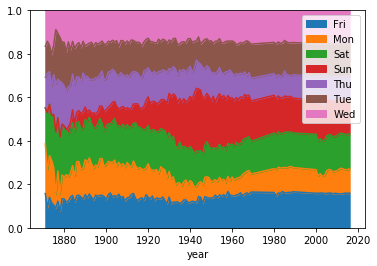

In [67]:
import matplotlib.pyplot as plt

optimized_gl['year'] = optimized_gl.date.dt.year
games_per_day = optimized_gl.pivot_table(index='year',columns='day_of_week',values='date',aggfunc=len)
games_per_day = games_per_day.divide(games_per_day.sum(axis=1),axis=0)

ax = games_per_day.plot(kind='area',stacked='true')
ax.legend(loc='upper right')
ax.set_ylim(0,1)
plt.show()

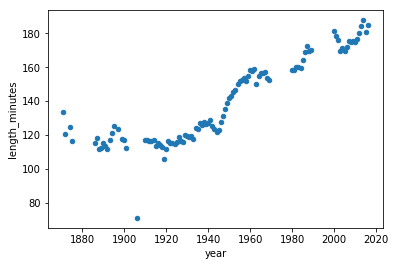

In [64]:
game_lengths = optimized_gl.pivot_table(index='year', values='length_minutes')
game_lengths.reset_index().plot.scatter('year','length_minutes')
plt.show()

In [70]:
gl.size

27677027

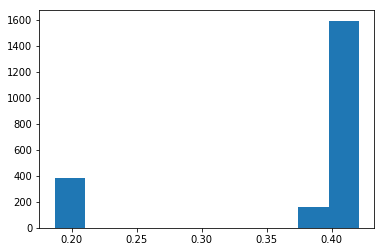

In [75]:
# We want each chunck to consume less than 50% of our total available memory

memory_footprints = []
chunk_iter = pd.read_csv("game_logs.csv", chunksize=80)
for chunk in chunk_iter:
    memory_footprints.append(chunk.memory_usage(deep=True).sum()/(1024*1024))

plt.hist(memory_footprints)
plt.show()

In [77]:
num_rows = 0
chunk_iter = pd.read_csv("game_logs.csv", chunksize=80)
for chunk in chunk_iter:
    num_rows += len(chunk)
print(num_rows)

171907


In [80]:
# Chunk and combine
dtypes = {"v_game_number": "int", "h_game_number": "int"}
chunk_iter = pd.read_csv("game_logs.csv", chunksize=80, dtype=dtypes)
lifespans = []
for chunk in chunk_iter:
    diff = chunk['v_game_number'] - chunk['h_game_number']
    lifespans.append(diff)
lifespans_dist = pd.concat(lifespans)
print(lifespans_dist)

0         0
1         0
2         1
3         2
4         1
5        -2
6        -3
7         1
8         0
9        -1
10        0
11        3
12       -2
13        1
14       -3
15        1
16       -3
17        4
18        0
19        4
20       -2
21        3
22        0
23       -3
24        4
25        0
26        0
27        6
28       -2
29       -4
         ..
171877    0
171878    0
171879    0
171880   -1
171881    0
171882    0
171883    0
171884    0
171885    0
171886    0
171887    0
171888    0
171889    0
171890    0
171891   -1
171892    0
171893    0
171894    0
171895   -1
171896    0
171897    0
171898    0
171899    0
171900    0
171901    0
171902    0
171903    0
171904    0
171905    0
171906   -1
Length: 171907, dtype: int32


In [88]:
%%timeit
lifespans = []
chunk_iter = pd.read_csv("game_logs.csv", chunksize=750, dtype={"v_game_number": "int", "h_game_number": "int"})
for chunk in chunk_iter:
    lifespans.append(chunk['v_game_number'] - chunk['h_game_number'])
lifespans_dist = pd.concat(lifespans)

4.94 s ± 158 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [89]:
# only bring in data for chunking speed things up
%%timeit
lifespans = []
chunk_iter = pd.read_csv("game_logs.csv", chunksize=750, dtype={"v_game_number": "int", "h_game_number": "int"},  usecols=['v_game_number', 'h_game_number'])
for chunk in chunk_iter:
    lifespans.append(chunk['v_game_number'] - chunk['h_game_number'])
lifespans_dist = pd.concat(lifespans)

SyntaxError: invalid syntax (<ipython-input-89-f3e650e93c0b>, line 2)

In [86]:
gl.head()

,date,number_of_game,day_of_week,v_name,v_league,v_game_number,h_name,h_league,h_game_number,v_score,...,h_player_7_name,h_player_7_def_pos,h_player_8_id,h_player_8_name,h_player_8_def_pos,h_player_9_id,h_player_9_name,h_player_9_def_pos,additional_info,acquisition_info
0,18710504,0,Thu,CL1,na,1,FW1,na,1,0,...,Ed Mincher,7.0,mcdej101,James McDermott,8.0,kellb105,Bill Kelly,9.0,NaN,Y
1,18710505,0,Fri,BS1,na,1,WS3,na,1,20,...,Asa Brainard,1.0,burrh101,Henry Burroughs,9.0,berth101,Henry Berthrong,8.0,HTBF,Y
2,18710506,0,Sat,CL1,na,2,RC1,na,1,12,...,Pony Sager,6.0,birdg101,George Bird,7.0,stirg101,Gat Stires,9.0,NaN,Y
3,18710508,0,Mon,CL1,na,3,CH1,na,1,12,...,Ed Duffy,6.0,pinke101,Ed Pinkham,5.0,zettg101,George Zettlein,1.0,NaN,Y
4,18710509,0,Tue,BS1,na,2,TRO,na,1,9,...,Steve Bellan,5.0,pikel101,Lip Pike,3.0,cravb101,Bill Craver,6.0,HTBF,Y


In [87]:
# get unique value through chunk and combine
chunk_iter = pd.read_csv("game_logs.csv", chunksize=250, usecols=['h_name'])
overall_vc = list()
for chunk in chunk_iter:
    chunk_vc = chunk['h_name'].value_counts()
    overall_vc.append(chunk_vc)
combined_vc = pd.concat(overall_vc)
print(combined_vc)

NY2    36
BS1    32
PH1    31
TRO    29
WS3    21
CL1    20
BL1    18
CH1    17
FW1     9
BR2     9
MID     9
RC1     7
WS4     6
BR1     6
NY2    42
BL1    37
BR2    36
BS1    36
PH1    35
PH2    28
WS5    16
BR1     8
ELI     8
MID     2
WS4     1
BL4     1
NY2    36
BS1    36
PH1    33
HR1    32
       ..
SDN     8
MIA     7
WAS     7
HOU     7
TOR     7
CHA     7
PIT     7
SLN     7
ANA     6
TEX     6
NYA     6
KCA     6
SFN     6
DET     6
ATL     6
MIL     5
MIN     5
NYN     5
LAN     5
BAL     4
SEA     4
TBA     4
PHI     4
CLE     4
CHN     3
BOS     3
COL     3
OAK     3
CIN     3
ARI     3
Name: h_name, Length: 14484, dtype: int64


In [90]:
chunk_iter = pd.read_csv("game_logs.csv", chunksize=250, usecols=['day_of_week'])
overall_vc = list()
for chunk in chunk_iter:
    chunk_vc = chunk['day_of_week'].value_counts()
    overall_vc.append(chunk_vc)
combined_vc = pd.concat(overall_vc)
final_vc = combined_vc.groupby(combined_vc.index).sum()
print(final_vc)

Fri    25152
Mon    19194
Sat    28891
Sun    26572
Thu    21780
Tue    24887
Wed    25431
Name: day_of_week, dtype: int64


In [91]:
gl.head()

,date,number_of_game,day_of_week,v_name,v_league,v_game_number,h_name,h_league,h_game_number,v_score,...,h_player_7_name,h_player_7_def_pos,h_player_8_id,h_player_8_name,h_player_8_def_pos,h_player_9_id,h_player_9_name,h_player_9_def_pos,additional_info,acquisition_info
0,18710504,0,Thu,CL1,na,1,FW1,na,1,0,...,Ed Mincher,7.0,mcdej101,James McDermott,8.0,kellb105,Bill Kelly,9.0,NaN,Y
1,18710505,0,Fri,BS1,na,1,WS3,na,1,20,...,Asa Brainard,1.0,burrh101,Henry Burroughs,9.0,berth101,Henry Berthrong,8.0,HTBF,Y
2,18710506,0,Sat,CL1,na,2,RC1,na,1,12,...,Pony Sager,6.0,birdg101,George Bird,7.0,stirg101,Gat Stires,9.0,NaN,Y
3,18710508,0,Mon,CL1,na,3,CH1,na,1,12,...,Ed Duffy,6.0,pinke101,Ed Pinkham,5.0,zettg101,George Zettlein,1.0,NaN,Y
4,18710509,0,Tue,BS1,na,2,TRO,na,1,9,...,Steve Bellan,5.0,pikel101,Lip Pike,3.0,cravb101,Bill Craver,6.0,HTBF,Y


In [92]:
chunk_iter = pd.read_csv("game_logs.csv", chunksize=250)
df_list = []
for chunk in chunk_iter:
    temp = chunk['day_of_week'].groupby(chunk['v_name']).value_counts()
    df_list.append(temp)
final_df = pd.concat(df_list)
id_gender_counts = final_df.groupby(final_df.index).sum()